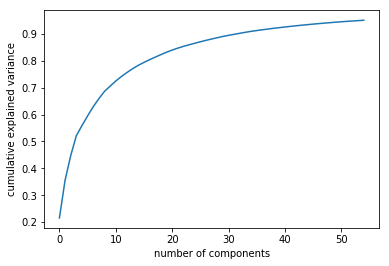

DecisionTreeClassifier 0.868536853685


In [2]:
from util import getData_tmp
from sklearn.tree import export_graphviz
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score  # finding scores from different classifiers
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# get data
X, Y = getData_tmp()  # X is image, Y is labels
X, Y = shuffle(X, Y)
N, D = X.shape
Ntrain = int(N * 0.8)
X_Train, Y_Train = X[:Ntrain], Y[:Ntrain]  # sets training set
X_Test, Y_Test = X[Ntrain:], Y[Ntrain:]  # test set

# feature reduction PCA w/o reducing dimensionality that computes min number of dimensions req to preserve 95% of training set variance
pca = PCA(n_components=0.95)
pca.fit(X_Train)
xtrain_pca = pca.transform(X_Train) #changes size of xtrain
xtest_pca = pca.transform(X_Test)

# classifier
tree_clf = DecisionTreeClassifier(max_depth=2)  # max_depth=2)
tree_clf.fit(xtrain_pca, Y_Train)
y_pred = tree_clf.predict(xtrain_pca)

#plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


#print('score', tree_clf.score(xtest_pca, Y_Test)) #78%
#print('pred label', tree_clf.predict(xtest_pca))
print(tree_clf.__class__.__name__, accuracy_score(Y_Train, y_pred))

# steps to create decision tree graph here
class_type = []
tree_class0 = tree_clf.classes_

for item in tree_class0:
    a = str(item)
    class_type.append(a)

with open("/Users/rhinomonkey/Desktop/MLFolder/tree_img_pca.txt", "w") as f:
    export_graphviz(tree_clf, out_file=f, class_names=class_type)
# take text and run in webgraphviz website
# samples: shows how many training instances it applies to
# gini measures node impurity, considered "pure" if gini = 0 which means all training instances belong to that class